## Health status distribution (Munukutla Durga Venkata Kashyap, Sai Mahesh Vemulapalli)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("count_by_all_dimensions_for_high_level_model_v2.csv")
data.head(5)

,Unnamed: 0,Age,Inc_group,Gender,Dead to Dead,Dead to Good Health,Dead to Poor Health,Dead to NH,Dead to HHC,Good Health to Dead,...,NH to HHC,HHC to Dead,HHC to Good Health,HHC to Poor Health,HHC to NH,HHC to HHC,Good Health at t,Bad Health at t,NH at t,HHC at t
0,0,50,1,1.male,4,0,0,0,0,2,...,0,2,2,2,0,5,149,95,1,11
1,1,51,1,1.male,7,0,0,0,0,2,...,0,1,5,10,1,7,309,193,1,24
2,2,52,1,1.male,7,0,0,0,0,9,...,0,4,9,7,0,19,418,273,0,39
3,3,53,1,1.male,8,0,0,0,0,9,...,0,10,8,14,2,15,572,351,2,49
4,4,54,1,1.male,14,0,0,0,0,3,...,0,6,18,21,0,18,641,418,1,63


In [3]:
print(data.columns)

Index(['Unnamed: 0', 'Age', 'Inc_group', 'Gender', 'Dead to Dead',
       'Dead to Good Health', 'Dead to Poor Health', 'Dead to NH',
       'Dead to HHC', 'Good Health to Dead', 'Good Health to Good Health',
       'Good Health to Poor Health', 'Good Health to NH', 'Good Health to HHC',
       'Poor Health to Dead', 'Poor Health to Good Health',
       'Poor Health to Poor Health', 'Poor Health to NH', 'Poor Health to HHC',
       'NH to Dead', 'NH to Good Health', 'NH to Poor Health', 'NH to NH',
       'NH to HHC', 'HHC to Dead', 'HHC to Good Health', 'HHC to Poor Health',
       'HHC to NH', 'HHC to HHC', 'Good Health at t', 'Bad Health at t',
       'NH at t', 'HHC at t'],
      dtype='object')


In [4]:
healthy_cols = []
nursing_cols = []
poor_health_cols = []
hhc_cols = []

for col in data.columns:
    if "Good Health to" in col:
        healthy_cols.append(col)
        continue
    if "NH to" in col:
        nursing_cols.append(col)
        continue
    if "Poor Health to" in col:
        poor_health_cols.append(col)
        continue
    if "HHC to" in col:
        hhc_cols.append(col)
        continue

In [5]:
print(healthy_cols)
print(nursing_cols)
print(poor_health_cols)
print(hhc_cols)

['Good Health to Dead', 'Good Health to Good Health', 'Good Health to Poor Health', 'Good Health to NH', 'Good Health to HHC']
['NH to Dead', 'NH to Good Health', 'NH to Poor Health', 'NH to NH', 'NH to HHC']
['Poor Health to Dead', 'Poor Health to Good Health', 'Poor Health to Poor Health', 'Poor Health to NH', 'Poor Health to HHC']
['HHC to Dead', 'HHC to Good Health', 'HHC to Poor Health', 'HHC to NH', 'HHC to HHC']


In [6]:
healthy_count = 0
nursing_count = 0
poor_health_count = 0
hhc_count = 0
dead_count = 0

for col in data.columns:
    if col in healthy_cols:
        healthy_count += data[col].sum()
        continue
    if col in nursing_cols:
        nursing_count += data[col].sum()
        continue
    if col in poor_health_cols:
        poor_health_count += data[col].sum()
        continue
    if col in hhc_cols:
        hhc_count += data[col].sum()
        continue
    if "Dead to" in col:
        dead_count += data[col].sum()

In [7]:
print(healthy_count)
print(nursing_count)
print(poor_health_count)
print(hhc_count)
print(dead_count)

total = healthy_count+nursing_count+poor_health_count+hhc_count+dead_count
print(total)

157397
4313
55403
15969
5276
238358


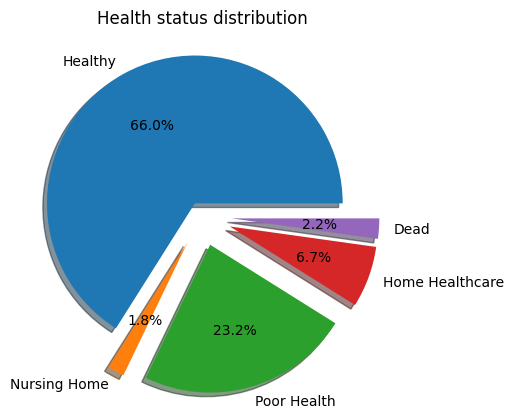

In [8]:
labels = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes = [(healthy_count/total)*100,(nursing_count/total)*100,(poor_health_count/total)*100,(hhc_count/total)*100,(dead_count/total)*100]
explode = [0.1,0.2,0.2,0.2,0.2]

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Health status distribution")
plt.show()

The above visualization shows the percentage of people moving to other states.

Insights:

In [9]:
healthy_to_other = []
for col in healthy_cols:
    healthy_to_other.append(data[col].sum())

healthy_to_dead = healthy_to_other[0]
healthy_to_healthy = healthy_to_other[1]
healthy_to_poor_health = healthy_to_other[2]
healthy_to_nh = healthy_to_other[3]
healthy_to_hhc = healthy_to_other[4]

print(healthy_to_dead)
print(healthy_to_healthy)
print(healthy_to_poor_health)
print(healthy_to_nh)
print(healthy_to_hhc)

healthy_total = 0
for i in healthy_to_other:
    healthy_total += i

if healthy_total == healthy_count:
    print("The counts match up for Good Health")
else:
    print("The counts do not match up for Good Health")

4691
128374
16706
1362
6264
The counts match up for Good Health


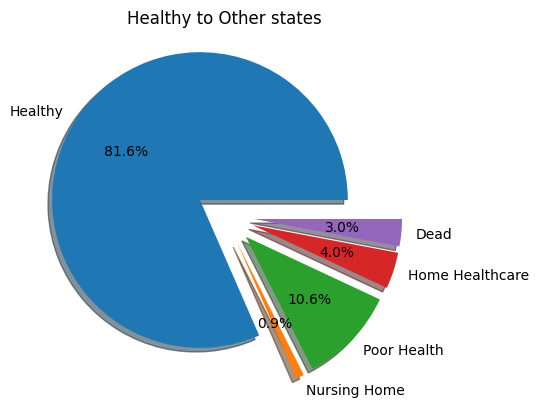

In [10]:
labels_new = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes_new = [(healthy_to_healthy/healthy_total)*100,(healthy_to_nh/healthy_total)*100,(healthy_to_poor_health/healthy_total)*100,(healthy_to_hhc/healthy_total)*100,(healthy_to_dead/healthy_total)*100]
explode_new = [0.2,0.2,0.2,0.2,0.2]

fig_new, ax_new = plt.subplots()
ax_new.pie(sizes_new, explode=explode_new, labels=labels_new, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Healthy to Other states")
plt.show()

The above visualization shows the percentage of healthy people moving to other states. From the numbers we can see that 81.6% of the total healthy people have moved to other states

Insight:

In [11]:
poor_health_to_other = []
for col in poor_health_cols:
    poor_health_to_other.append(data[col].sum())

poor_health_to_dead = poor_health_to_other[0]
poor_health_to_healthy = poor_health_to_other[1]
poor_health_to_poor_health = poor_health_to_other[2]
poor_health_to_nh = poor_health_to_other[3]
poor_health_to_hhc = poor_health_to_other[4]

print(poor_health_to_dead)
print(poor_health_to_healthy)
print(poor_health_to_poor_health)
print(poor_health_to_nh)
print(poor_health_to_hhc)

poor_health_total = 0
for i in poor_health_to_other:
    poor_health_total += i

if poor_health_total == poor_health_count:
    print("The counts match up for Poor Health")
else:
    print("The counts do not match up for Poor Health")

4762
13509
30649
1362
5121
The counts match up for Poor Health


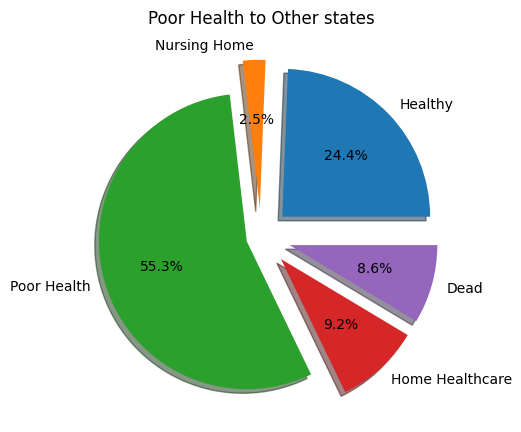

In [12]:
labels_new_2 = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes_new_2 = [(poor_health_to_healthy/poor_health_total)*100,(poor_health_to_nh/poor_health_total)*100,
             (poor_health_to_poor_health/poor_health_total)*100,(poor_health_to_hhc/poor_health_total)*100,(poor_health_to_dead/poor_health_total)*100]
explode_new_2 = [0.2,0.2,0.1,0.2,0.2]

fig_new_2, ax_new_2 = plt.subplots()
ax_new_2.pie(sizes_new_2, explode=explode_new_2, labels=labels_new_2, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Poor Health to Other states\n")
plt.show()

The above visualization shows the percentage of Poor Health people moving to other states. From the numbers we can see that 55.3% of the total Poor Health people have moved to other states

Insight:

In [13]:
nursing_to_other = []
for col in nursing_cols:
    nursing_to_other.append(data[col].sum())

nursing_to_dead = nursing_to_other[0]
nursing_to_healthy = nursing_to_other[1]
nursing_to_poor_health = nursing_to_other[2]
nursing_to_nh = nursing_to_other[3]
nursing_to_hhc = nursing_to_other[4]

print(nursing_to_dead)
print(nursing_to_healthy)
print(nursing_to_poor_health)
print(nursing_to_nh)
print(nursing_to_hhc)

nursing_total = 0
for i in nursing_to_other:
    nursing_total += i

if nursing_total == nursing_count:
    print("The counts match up for Nursing Home")
else:
    print("The counts do not match up for Nursing Home")

1662
113
136
2277
125
The counts match up for Nursing Home


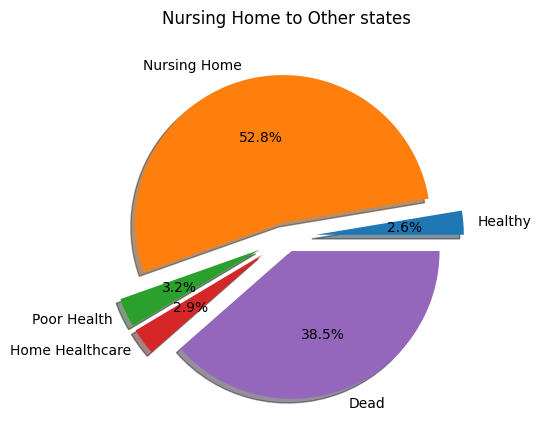

In [14]:
labels_new_3 = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes_new_3 = [(nursing_to_healthy/nursing_total)*100,(nursing_to_nh/nursing_total)*100,
             (nursing_to_poor_health/nursing_total)*100,(nursing_to_hhc/nursing_total)*100,(nursing_to_dead/nursing_total)*100]
explode_new_3 = [0.2,0.1,0.2,0.2,0.1]

fig_new_3, ax_new_3 = plt.subplots()
ax_new_3.pie(sizes_new_3, explode=explode_new_3, labels=labels_new_3, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Nursing Home to Other states\n")
plt.show()

The above visualization shows the percentage of Nursing home people moving to other states. From the numbers we can see that 52.8% of the total Nursing people have moved to other states while 38.5 percent have died

In [15]:
hhc_to_other = []
for col in hhc_cols:
    hhc_to_other.append(data[col].sum())

hhc_to_dead = hhc_to_other[0]
hhc_to_healthy = hhc_to_other[1]
hhc_to_poor_health = hhc_to_other[2]
hhc_to_nh = hhc_to_other[3]
hhc_to_hhc = hhc_to_other[4]

print(hhc_to_dead)
print(hhc_to_healthy)
print(hhc_to_poor_health)
print(hhc_to_nh)
print(hhc_to_hhc)

hhc_total = 0
for i in hhc_to_other:
    hhc_total += i

if hhc_total == hhc_count:
    print("The counts match up for Home Healthcare")
else:
    print("The counts do not match up for Home Healthcare")

2600
4114
3678
1179
4398
The counts match up for Home Healthcare


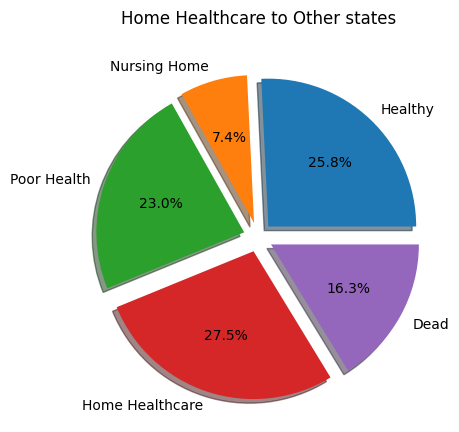

In [16]:
labels_new_4 = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes_new_4 = [(hhc_to_healthy/hhc_total)*100,(hhc_to_nh/hhc_total)*100,
             (hhc_to_poor_health/hhc_total)*100,(hhc_to_hhc/hhc_total)*100,(hhc_to_dead/hhc_total)*100]
explode_new_4 = [0.1,0.1,0.1,0.1,0.1]

fig_new_4, ax_new_4 = plt.subplots()
ax_new_4.pie(sizes_new_4, explode=explode_new_4, labels=labels_new_4, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Home Healthcare to Other states\n")
plt.show()

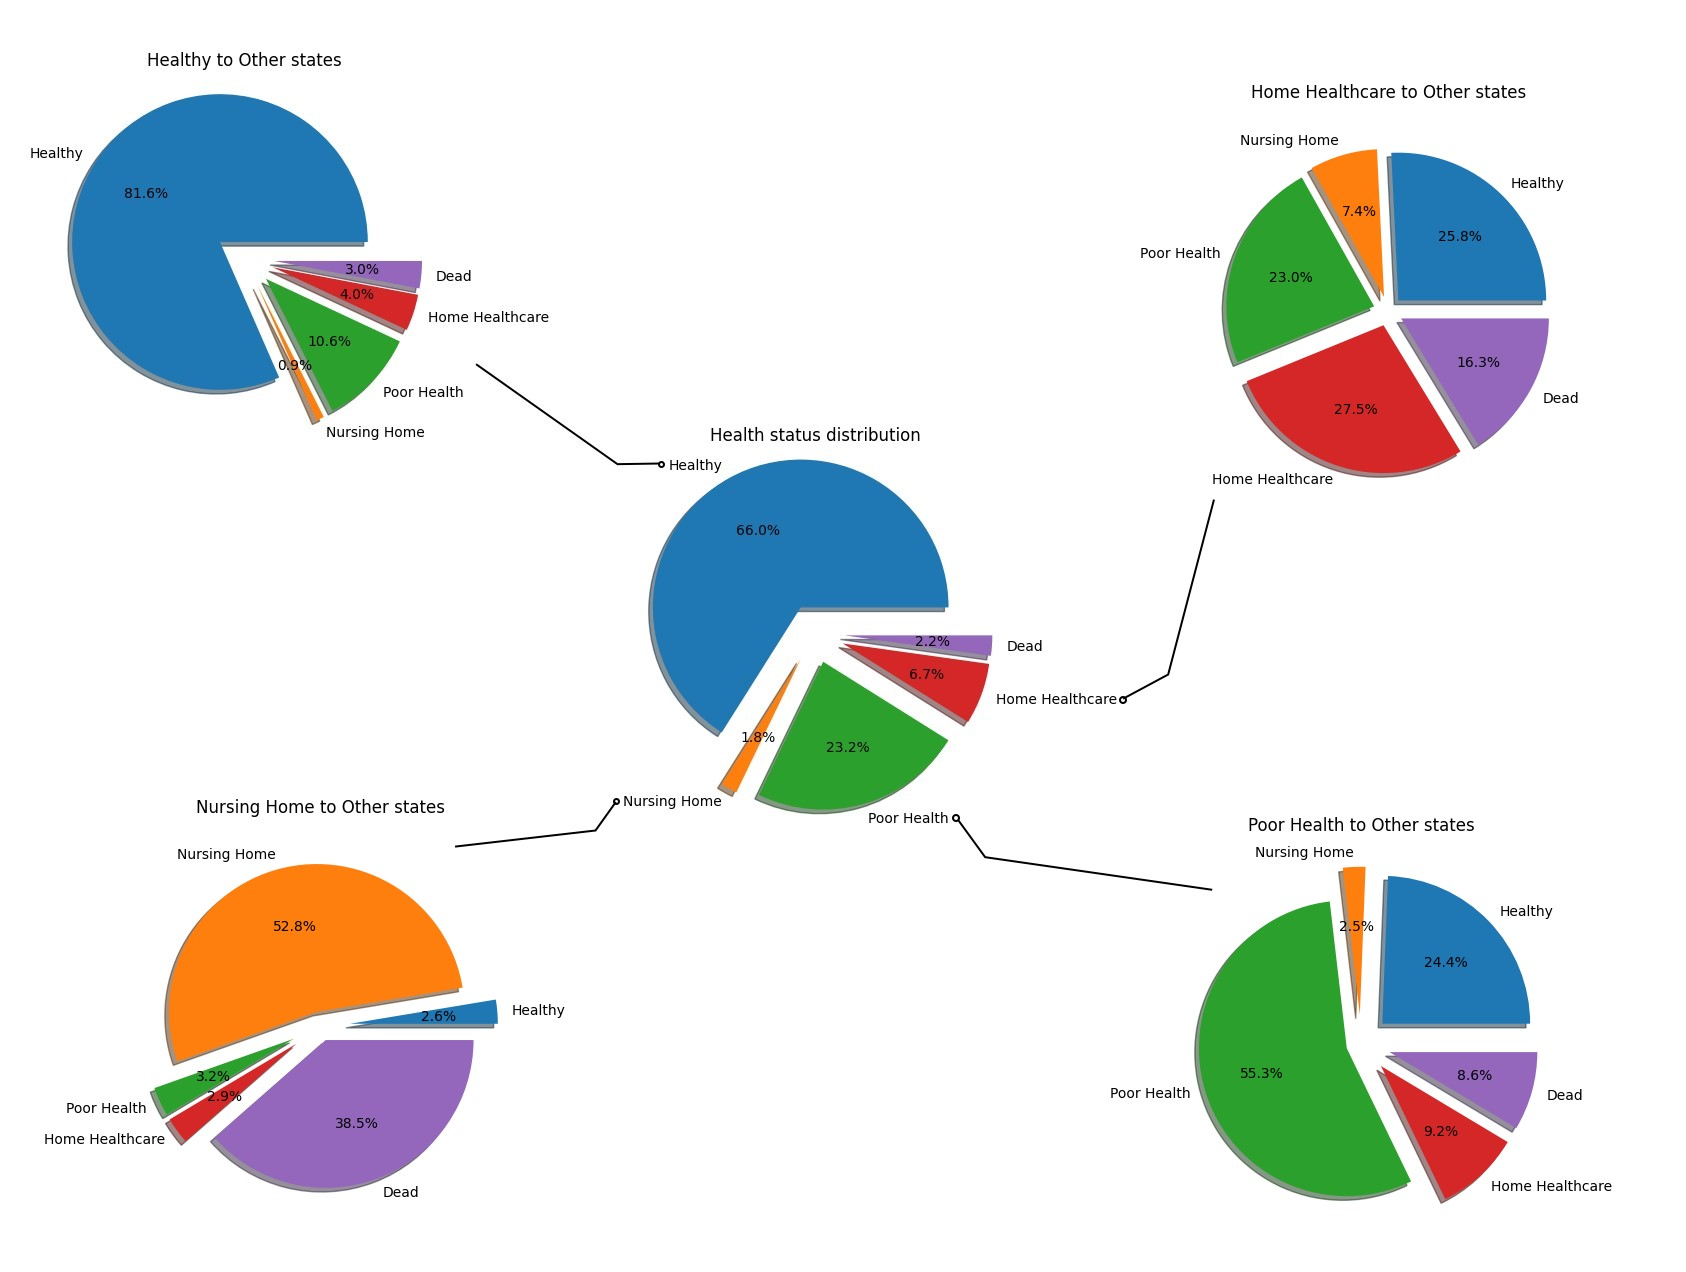

This is the overall Visualization combining all the possible ways people have transcended to other states

Insight: